<a href="https://colab.research.google.com/github/Ahmedewes/Project_python_libraries/blob/main/Project_pyhon_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import requests
import pandas as pd

limit = 30
skip = 0
all_pages = []

while True:
    url = f"https://dummyjson.com/users?limit={limit}&skip={skip}"
    response = requests.get(url)
    response.raise_for_status()

    data = response.json()
    users = data["users"]


    if not users:
        break

    df_page = pd.json_normalize(users)
    all_pages.append(df_page)

    skip += limit

df = pd.concat(all_pages, ignore_index=True)
print(df)
df.to_csv("users.csv", index=False)
print("Saved to users.xlsx")



      id firstName  lastName maidenName  age  gender  \
0      1     Emily   Johnson      Smith   29  female   
1      2   Michael  Williams              36    male   
2      3    Sophia     Brown              43  female   
3      4     James     Davis              46    male   
4      5      Emma    Miller    Johnson   31  female   
..   ...       ...       ...        ...  ...     ...   
203  204     Mateo     Perez              46    male   
204  205    Aubrey    Garcia       Gray   29  female   
205  206     Elena     Baker              35  female   
206  207      Jace     Smith              42    male   
207  208  Samantha  Martinez      Lopez   28  female   

                                 email             phone   username  \
0        emily.johnson@x.dummyjson.com  +81 965-431-3024     emilys   
1     michael.williams@x.dummyjson.com  +49 258-627-6644   michaelw   
2         sophia.brown@x.dummyjson.com  +81 210-652-2785    sophiab   
3          james.davis@x.dummyjson.com  +49

In [90]:
# Read data from csv file
df =pd.read_csv("users.csv")




In [91]:
# Shape of the DataFrame
df.shape

(208, 52)

In [92]:
# List of all column names
df.columns.tolist()

['id',
 'firstName',
 'lastName',
 'maidenName',
 'age',
 'gender',
 'email',
 'phone',
 'username',
 'password',
 'birthDate',
 'image',
 'bloodGroup',
 'height',
 'weight',
 'eyeColor',
 'ip',
 'macAddress',
 'university',
 'ein',
 'ssn',
 'userAgent',
 'role',
 'hair.color',
 'hair.type',
 'address.address',
 'address.city',
 'address.state',
 'address.stateCode',
 'address.postalCode',
 'address.coordinates.lat',
 'address.coordinates.lng',
 'address.country',
 'bank.cardExpire',
 'bank.cardNumber',
 'bank.cardType',
 'bank.currency',
 'bank.iban',
 'company.department',
 'company.name',
 'company.title',
 'company.address.address',
 'company.address.city',
 'company.address.state',
 'company.address.stateCode',
 'company.address.postalCode',
 'company.address.coordinates.lat',
 'company.address.coordinates.lng',
 'company.address.country',
 'crypto.coin',
 'crypto.wallet',
 'crypto.network']

In [93]:
# Data types of each column
df.dtypes

,0
id,int64
firstName,object
lastName,object
maidenName,object
age,int64
gender,object
email,object
phone,object
username,object
password,object


In [94]:
# Number of missing values per column
df.isnull().sum().sort_values(ascending=True)

,0
id,0
firstName,0
lastName,0
age,0
email,0
gender,0
phone,0
username,0
bloodGroup,0
password,0


In [95]:
# Number of duplicate rows
x=df.duplicated().sum()
print(x)



0


In [96]:
# Summary statistics for numeric columns
df.describe()

,id,age,height,weight,address.postalCode,address.coordinates.lat,address.coordinates.lng,bank.cardNumber,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000
mean,104.500000,33.139423,175.720240,75.038606,49476.177885,-0.357609,-11.729826,4.352591e+15,51994.442308,2.267603,-2.701298
std,60.188592,5.544269,14.119984,14.090775,21838.772935,53.866250,103.855891,1.871526e+15,23329.345011,50.015813,99.876659
min,1.000000,23.000000,150.250000,50.100000,10672.000000,-89.077500,-179.958549,3.407609e+14,10371.000000,-87.103718,-176.705236
25%,52.750000,29.000000,164.187500,62.547500,31945.750000,-52.583475,-101.197683,3.608283e+15,30837.500000,-40.780079,-83.301244
50%,104.500000,32.000000,177.430000,75.985000,49007.500000,2.925385,-29.607807,4.940431e+15,55624.500000,7.324804,-6.090248
75%,156.250000,36.000000,186.960000,86.992500,65612.500000,45.281022,71.862635,6.011151e+15,72775.750000,43.829917,84.288805
max,208.000000,46.000000,199.810000,99.540000,89729.000000,89.781211,179.922909,6.293711e+15,89416.000000,89.270633,178.804291


In [97]:
# Value counts for important categorical columns
df["gender"].value_counts()

,count
gender,
female,106
male,102


In [98]:
df["bloodGroup"].value_counts()

,count
bloodGroup,
O-,31
B-,31
AB-,29
AB+,29
B+,25
O+,22
A+,21
A-,20


In [99]:
df["eyeColor"].value_counts()

,count
eyeColor,
Brown,35
Hazel,34
Green,28
Blue,24
Gray,24
Violet,22
Red,21
Amber,20


In [100]:
df["role"].value_counts()

,count
role,
user,193
moderator,10
admin,5


In [101]:
df["address.country"].value_counts()

,count
address.country,
United States,208


In [102]:

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
df["maidenName"].value_counts()

,count
maidenName,
Adams,4
Brown,3
Hernandez,3
Evans,3
Martin,2
Baker,2
Johnson,2
Taylor,2
Perez,2


In [103]:
df.drop("maidenName", axis=1, inplace=True)
df.tail(5)

,id,firstName,lastName,age,gender,email,phone,username,password,birthDate,image,bloodGroup,height,weight,eyeColor,ip,macAddress,university,ein,ssn,userAgent,role,hair.color,hair.type,address.address,address.city,address.state,address.stateCode,address.postalCode,address.coordinates.lat,address.coordinates.lng,address.country,bank.cardExpire,bank.cardNumber,bank.cardType,bank.currency,bank.iban,company.department,company.name,company.title,company.address.address,company.address.city,company.address.state,company.address.stateCode,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng,company.address.country,crypto.coin,crypto.wallet,crypto.network
203,204,Mateo,Perez,46,male,mateo.perez@x.dummyjson.com,+44 704-302-8113,mateop,mateoppass,1979-1-26,https://dummyjson.com/icon/mateop/128,AB-,172.33,56.27,Brown,251.91.116.19,fc:6e:67:26:8b:ff,University of Florida,654-396,199-992-447,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Black,Curly,798 Ninth Street,Jacksonville,Texas,TX,12771,23.706655,-56.346259,United States,03/30,6269389588713214,UnionPay,NZD,DE89507404827985024217,Engineering,"Hickle, Altenwerth and Stamm",Software Engineer,1326 Second Street,Denver,Arizona,AZ,10591,18.569908,-50.337520,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
204,205,Aubrey,Garcia,29,female,aubrey.garcia@x.dummyjson.com,+1 470-576-9130,aubreyg,aubreygpass,1996-11-5,https://dummyjson.com/icon/aubreyg/128,AB+,192.28,85.89,Brown,0.163.108.147,fb:ae:f9:15:24:90,Pepperdine University,428-615,344-154-808,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,user,Red,Curly,1221 Washington Street,Los Angeles,South Carolina,SC,78498,80.449539,-142.231527,United States,01/29,4922036660101826,Visa,NZD,DE91641615994664908034,Legal,Moore Inc,Web Developer,240 Third Street,San Francisco,Minnesota,MN,58649,3.609112,-35.397672,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
205,206,Elena,Baker,35,female,elena.baker@x.dummyjson.com,+49 978-346-6960,elenab,elenabpass,1990-3-16,https://dummyjson.com/icon/elenab/128,O+,150.62,95.55,Brown,85.35.8.29,83:75:b2:b6:ca:8b,Tufts University,509-840,640-201-673,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,user,Brown,Straight,117 Maple Street,San Francisco,Tennessee,TN,40535,30.069731,-118.879243,United States,01/30,5437614839810348,Mastercard,INR,DE24112202737130790320,Engineering,Heller LLC,Project Manager,139 Jefferson Street,San Antonio,Idaho,ID,50546,1.356153,175.897893,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
206,207,Jace,Smith,42,male,jace.smith@x.dummyjson.com,+1 634-923-7779,jaces,jacespass,1983-12-18,https://dummyjson.com/icon/jaces/128,A+,185.55,59.24,Gray,72.202.161.214,5e:fa:19:da:b9:fc,University of Rochester,422-384,862-683-716,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Black,Straight,1856 Tenth Street,Seattle,South Dakota,SD,60977,-64.699698,-99.677422,United States,05/30,6011114091979826,Discover,CNY,DE08456467042398880704,Marketing,"Quigley, Dare and Kovacek",Data Scientist,574 Madison Street,San Francisco,Arizona,AZ,19079,2.230209,84.272010,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
207,208,Samantha,Martinez,28,female,samantha.martinez@x.dummyjson.com,+49 493-402-2473,samanthal,samanthalpass,1997-9-3,https://dummyjson.com/icon/samanthal/128,AB+,164.29,55.48,Hazel,168.48.152.139,64:d:24:41:77:b8,University of Texas--Austin,951-858,408-210-580,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Green,Straight,1890 First Street,Los Angeles,New Hampshire,NH,53772,-89.077500,-81.825967,United States,04/27,4729390503046994,Visa,CAD,DE61932146076474116124,Business Development,Schowalter Group,Project Manager,1046 Main Street,San Diego,Massachusetts,MA,75183,-43.398744,-176.705236,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)


In [ ]:
df.drop(["company.address.stateCode","crypto.wallet","company.address.postalCode","bank.iban","macAddress","userAgent","address.postalCode","address.stateCode"], axis=1, inplace=True)

In [108]:
df.sample(10)

,id,firstName,lastName,age,gender,email,phone,username,password,birthDate,image,bloodGroup,height,weight,eyeColor,ip,university,ein,ssn,role,hair.color,hair.type,address.address,address.city,address.state,address.coordinates.lat,address.coordinates.lng,address.country,bank.cardExpire,bank.cardNumber,bank.cardType,bank.currency,company.department,company.name,company.title,company.address.address,company.address.city,company.address.state,company.address.coordinates.lat,company.address.coordinates.lng,company.address.country,crypto.coin,crypto.network
11,12,Mia,Rodriguez,25,female,mia.rodriguez@x.dummyjson.com,+49 989-461-8403,miar,miarpass,2000-8-4,https://dummyjson.com/icon/miar/128,O-,188.08,56.03,Blue,11.72.253.90,William & Mary,754-660,749-524-124,moderator,Purple,Wavy,1627 Sixth Street,Jacksonville,West Virginia,24.857497,-34.865429,United States,02/29,343932350909214,American Express,CAD,Accounting,"Miller, Schowalter and Wisozk",Business Analyst,1039 Washington Street,Philadelphia,New Jersey,85.455933,164.246103,United States,Bitcoin,Ethereum (ERC20)
99,100,Lila,Hudson,28,female,lila.hudson@x.dummyjson.com,+91 697-236-1544,lilah,lilahpass,1997-9-1,https://dummyjson.com/icon/lilah/128,AB+,190.10,70.03,Gray,96.35.42.117,University of Notre Dame,306-959,297-645-204,user,Blonde,Wavy,262 Ninth Street,Chicago,Nevada,-68.233207,-67.042550,United States,12/29,3573611722474066,JCB,EUR,Legal,"Hartmann, Hilpert and Kulas",Sales Manager,1825 Oak Street,New York,Kansas,50.551530,39.433391,United States,Bitcoin,Ethereum (ERC20)
159,160,Claire,Foster,30,female,claire.foster@x.dummyjson.com,+81 570-848-1400,claires,clairespass,1995-2-24,https://dummyjson.com/icon/claires/128,AB+,167.27,66.04,Brown,158.10.110.213,New York University (NYU),344-208,405-361-464,user,Blonde,Wavy,981 Pine Street,San Jose,Massachusetts,-34.990544,5.238312,United States,03/28,6011676927223587,Discover,CAD,Accounting,Kulas - Littel,Chief Financial Officer,1955 Seventh Street,Charlotte,South Carolina,42.501107,113.606585,United States,Bitcoin,Ethereum (ERC20)
156,157,Aaron,Cook,28,male,aaron.cook@x.dummyjson.com,+81 362-539-6973,aaronc,aaroncpass,1997-1-26,https://dummyjson.com/icon/aaronc/128,AB+,165.60,61.17,Green,71.248.65.203,University of Pennsylvania,862-277,270-351-584,user,Blue,Curly,169 First Street,Phoenix,Wyoming,-6.538887,-58.475605,United States,03/29,6011771715186854,Discover,AUD,Support,"Leffler, Rolfson and Becker",Support Specialist,380 Maple Street,San Antonio,Michigan,-31.851481,-63.253251,United States,Bitcoin,Ethereum (ERC20)
13,14,Charlotte,Lopez,37,female,charlotte.lopez@x.dummyjson.com,+44 373-953-5028,charlottem,charlottempass,1988-6-8,https://dummyjson.com/icon/charlottem/128,AB-,178.92,82.46,Brown,119.103.95.60,Northeastern University,364-782,255-491-479,moderator,Gray,Kinky,208 Second Street,Columbus,Ohio,-44.443762,-151.420561,United States,12/27,3634388457177035,Diners Club International,PKR,Accounting,Zulauf and Sons,Chief Executive Officer,569 Jefferson Street,Los Angeles,Montana,-18.371256,22.566258,United States,Bitcoin,Ethereum (ERC20)
40,41,Evan,Reed,33,male,evan.reed@x.dummyjson.com,+61 932-569-4853,evanr,evanrpass,1992-6-16,https://dummyjson.com/icon/evanr/128,O+,152.55,90.40,Blue,6.25.22.101,University of California--Irvine,496-858,197-874-889,user,Blonde,Kinky,98 Tenth Street,San Antonio,North Carolina,89.781211,-50.810277,United States,05/27,372693683592457,American Express,AUD,Human Resources,Jacobs - Nader,Business Analyst,1130 Tenth Street,Columbus,Pennsylvania,-55.627873,-146.083081,United States,Bitcoin,Ethereum (ERC20)
199,200,Adrian,Flores,44,male,adrian.flores@x.dummyjson.com,+61 524-858-7351,adrianf,adrianfpass,1981-5-1,https://dummyjson.com/icon/adrianf/128,O+,183.05,97.74,Green,86.244.141.158,Stanford University,965-469,272-696-785,user,Purple,Wavy,1395 Madison Street,New York,Delaware,48.779884,-84.200415,United States,08/27,347972688413683,American Express,JPY,Legal,Rippin Inc,Technical Support Engineer,279 M

In [109]:
df[["age", "height", "weight"]].isnull().sum()

,0
age,0
height,0
weight,0


In [110]:
df["age"].fillna(df["age"].median(), inplace=True)
df["height"].fillna(df["height"].median(), inplace=True)
df["weight"].fillna(df["weight"].median(), inplace=True)

/tmp/ipython-input-3554161558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-3554161558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

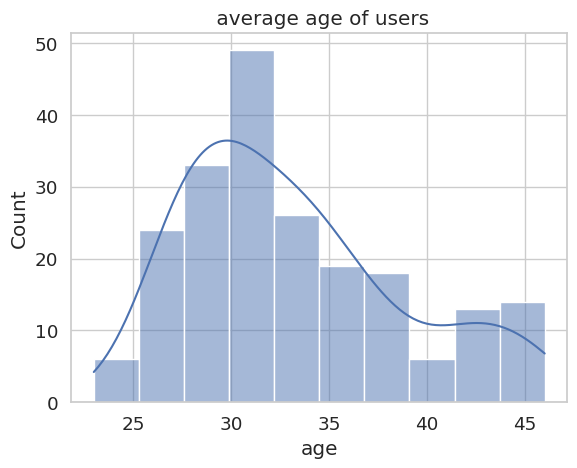

In [121]:
plt.figure()
sns.histplot(df["age"], kde=True)
plt.title(" average age of users")
plt.show()

# avg of ages --> from 30 to 35

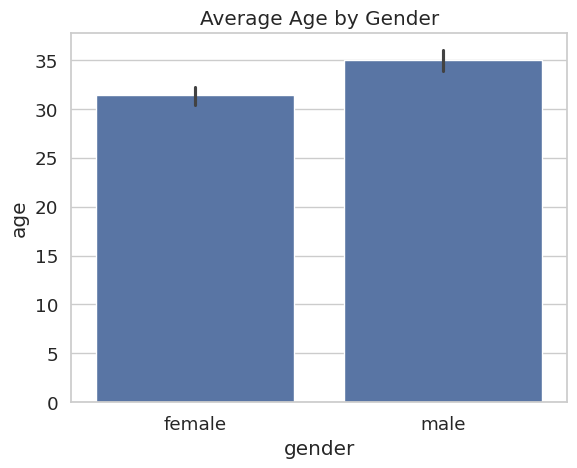

In [122]:
plt.figure()
sns.barplot(x="gender", y="age", data=df)
plt.title("Average Age by Gender")
plt.show()

# avg age by gender --> male --> 35     , female --> 30 to 33

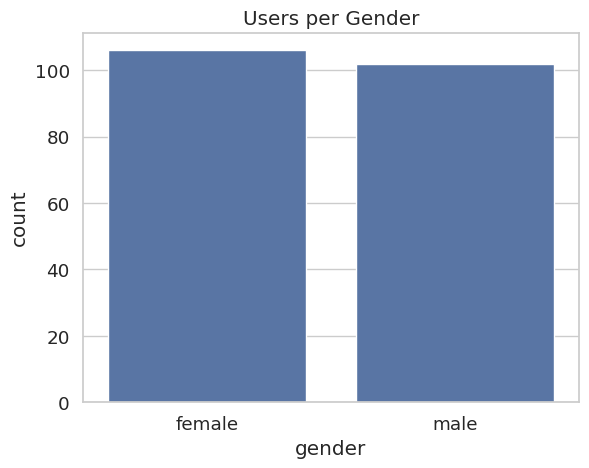

In [123]:
plt.figure()
sns.countplot(x="gender", data=df)
plt.title("Users per Gender")
plt.show()

# users per genders: male > female

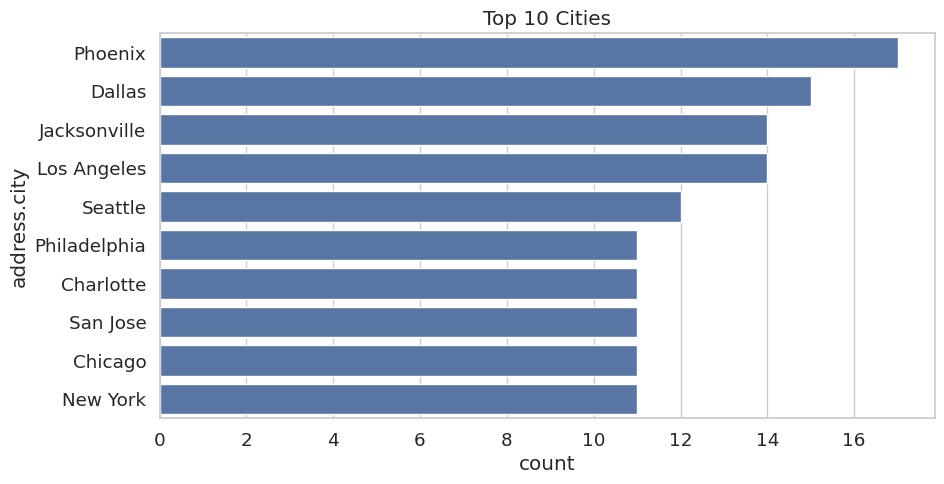

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(y="address.city",
              data=df,
              order=df["address.city"].value_counts().head(10).index)
plt.title("Top 10 Cities")
plt.show()

In [140]:
avg_height_weight = df[["height", "weight"]].mean()

print("Average Height:", avg_height_weight["height"])
print("Average Weight:", avg_height_weight["weight"])

Average Height: 175.72024038461538
Average Weight: 75.03860576923077


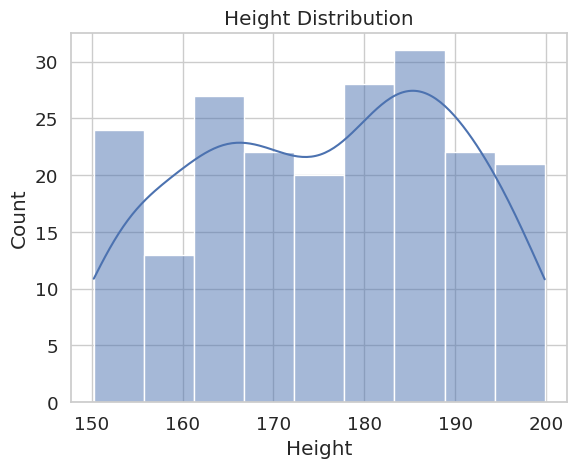

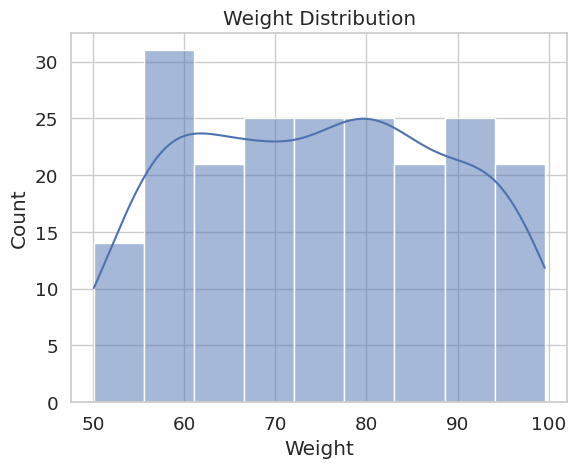

In [142]:
plt.figure()
sns.histplot(df["height"], kde=True)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")

plt.figure()
sns.histplot(df["weight"], kde=True)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

# Based on correlation values and scatter plots, there is no strong relationship between age and height or weight. The correlation coefficients are close to zero, indicating weak or no linear relationship